In [1]:
import os
import sys
import numpy as np
import pandas as pd
import igraph as ig
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_settings_v3 import *
from plot_auxiliary import *
from planar import create_proximity_graph
from auxiliary import getLinearReg, get_base_network_name, powerlaw

%matplotlib inline

net_type = 'PDT'
param = 'param'

net_dir = os.path.join('..', 'networks', net_type)

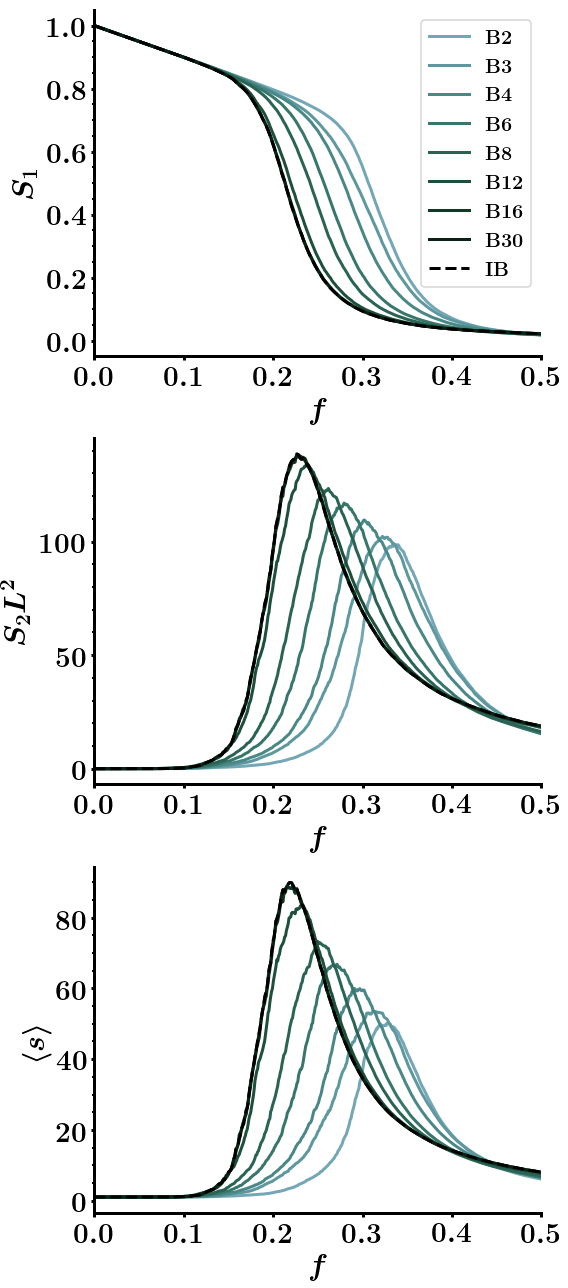

In [2]:
Bi_range = [2, 3, 4, 6, 8, 12, 16, 30]
N = 1024

colormap = sns.cubehelix_palette(
    len(Bi_range), start=2, rot=0.3, light=0.6, dark=0.1
)


ncols = 1
nrows = 3
fig, axes = plt.subplots(figsize=(8*ncols, 6*nrows), ncols=ncols, nrows=nrows)
axes[0].set_ylabel(r'$S_1$')
axes[1].set_ylabel(r'$S_2L^2$')
axes[2].set_ylabel(r'$\langle s \rangle$')
for ax in axes:
    ax.set_xlabel(r'$f$')
    ax.set_xlim(0, 0.5)

for i, l in enumerate(Bi_range):
    attack = 'Btw_cutoff{}'.format(l)
    try:
        df = load_dataframe(net_type, N, param, attack)
    except FileNotFoundError:
        print(N, l)
        continue
    axes[0].plot(df.f, df.Sgcc, color=colormap[i], label=attack_dict[attack])
    axes[1].plot(df.f, df.Nsec, color=colormap[i])
    axes[2].plot(df.f, df.meanS, color=colormap[i])

attack = 'Btw'
df = load_dataframe(net_type, N, param, attack)
axes[0].plot(df.f, df.Sgcc, '--', color='k', label=attack_dict[attack])
axes[1].plot(df.f, df.Nsec, '--', color='k')
axes[2].plot(df.f, df.meanS, '--', color='k')

axes[0].legend(fontsize=20)

sns.despine()
plt.tight_layout()

fig_name = os.path.join(fig_dir, 'order_par_and_susceptibility_Bl_{}'.format(net_type))
plt.savefig(fig_name + '.png')
plt.savefig(fig_name + '.pdf')

plt.tight_layout()
plt.show()

In [42]:
sizes = [128, 256, 512, 1024, 2048, 4096, 8192, 16384]
sizes = [128, 256, 512, 1024, 2048, 4096, 8192]#, 16384]
l_values = np.arange(2, 100)
rc_values, rc_values_std = get_rc_values(sizes, l_values=l_values, min_nseeds=100, base_attack='BtwU', net_type=net_type)
l_cutoff = get_l_cutoff(sizes, threshold=0.02, rc_values=rc_values, base_attack='BtwU', net_type=net_type)
print(l_cutoff)
#l_cutoff[8192] = 45

128
256
512
1024
2048
4096
8192
{128: 9, 256: 13, 512: 16, 1024: 20}


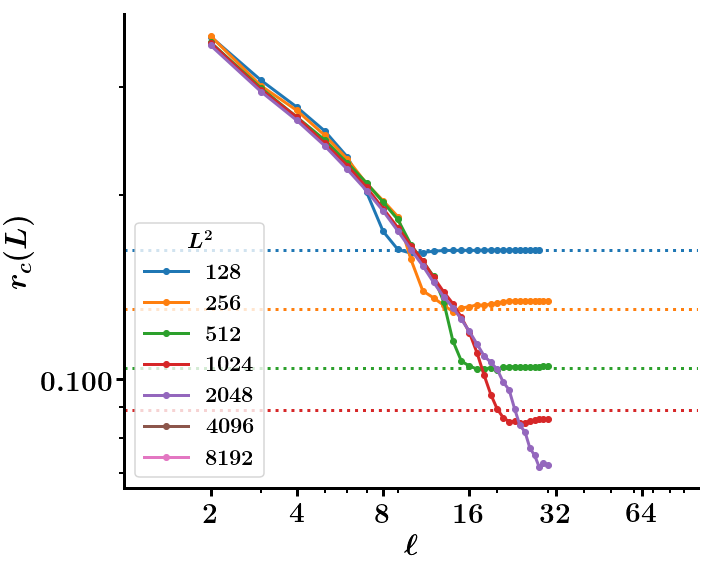

In [43]:
ncols = 1
nrows = 1
fig, ax = plt.subplots(figsize=(10*ncols,8*nrows), ncols=ncols, nrows=nrows)


ax.tick_params(which='minor', length=5)
ax.tick_params(which='major', length=8)


ax.set_xscale('log')
ax.set_xlim(1., 100)
ax.set_xticks([2, 4, 8, 16, 32, 64])
ax.get_xaxis().set_minor_formatter(mpl.ticker.NullFormatter())
ax.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_yscale('log')
#ax.set_ylim(0.015, 0.4)
#ax.set_yticks([0.03, 0.1, 0.3])
ax.get_yaxis().set_minor_formatter(mpl.ticker.NullFormatter())
ax.get_yaxis().set_major_formatter(mpl.ticker.ScalarFormatter())

#ax.grid(True)
#ax.set_ylim(0, 0.15)
ax.set_xlabel(r'$\ell$')
ax.set_ylabel(r'$r_c(L)$')
#sizes = [32768]

for i, size in enumerate(sizes): 

    mask = ~np.isnan(rc_values[size][1:])
    
    X = l_values[mask]
    Y = rc_values[size][1:][mask]
    
    #ax.plot(l_values, rc_values[size][1:], 'o-', 
    ax.plot(X, Y, 'o-', 
            label=r'${{{}}}$'.format(size)
    )
    ax.axhline(rc_values[size][0], linestyle=':', color=colors[i])
    #ax.axvline(l_cutoff[size], linestyle=':', color=colors[i])
legend = ax.legend(loc='lower left', fontsize=22)
legend.set_title(r'$L^2$', prop={'size':22})
    
sns.despine()
plt.tight_layout()
fig_name = os.path.join(fig_dir, 'peak_shifting_Bl_rc_{}_a'.format(net_type))
plt.savefig(fig_name + '.png', transparent=False)
plt.savefig(fig_name + '.pdf')

plt.tight_layout()
plt.show()

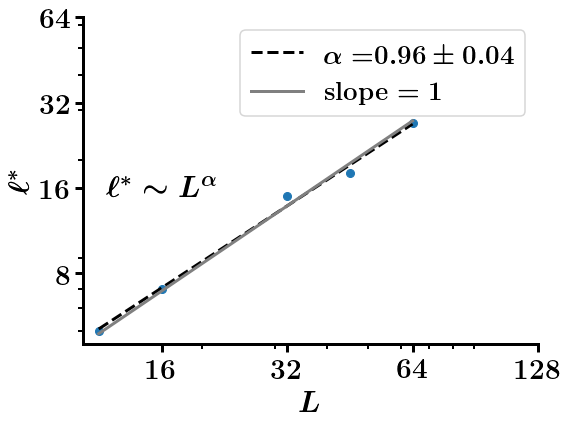

In [39]:
ncols = 1
nrows = 1
fig, ax = plt.subplots(figsize=(8*ncols,6*nrows), ncols=ncols, nrows=nrows)

ax.tick_params(which='minor', length=5)
ax.tick_params(which='major', length=8)

X = np.sqrt(list(l_cutoff.keys()))
Y = np.array(list(l_cutoff.values()))
ax.set_xlabel(r'$L$')
ax.set_ylabel(r'$\ell^*$')
ax.set_xscale('log')
ax.set_yscale('log')
ax.plot(X, Y, 'o', markersize=8)

Y_pred, slope, y_err = getLinearReg(X[-5:], Y[-5:])

c = Y_pred[-1] / X[-1]**slope
Y_pred = powerlaw(X, slope, c)

label = r'$\alpha = $' + r'${{{:.2f}}}\pm{{{:.2f}}}$'.format(slope, y_err)
ax.plot(X, Y_pred, '--', color='k', label=label)
ax.text(0.05, 0.45, r'$\ell^* \sim L^{\alpha}$', fontsize=30, transform=ax.transAxes)


c = Y_pred[-3] / X[-3]
Y_pred = powerlaw(X, 1, c)

label = r'$\mathrm{slope} = 1$' 
ax.plot(X, Y_pred, '-', color='gray', label=label)


#ax.set_xlim(12, 128)
ax.set_xticks([16, 32, 64, 128])
ax.get_xaxis().set_minor_formatter(mpl.ticker.NullFormatter())
ax.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())

ax.set_yticks([8, 16, 32, 64])
ax.get_yaxis().set_minor_formatter(mpl.ticker.NullFormatter())
ax.get_yaxis().set_major_formatter(mpl.ticker.ScalarFormatter())

ax.legend()
    
sns.despine()
plt.tight_layout()
fig_name = os.path.join(fig_dir, 'peak_shifting_Bl_rc_{}_b'.format(net_type))
plt.savefig(fig_name + '.png', transparent=False)
plt.savefig(fig_name + '.pdf')

plt.tight_layout()
plt.show()

1024
2048
4096
8192


IndexError: list index out of range

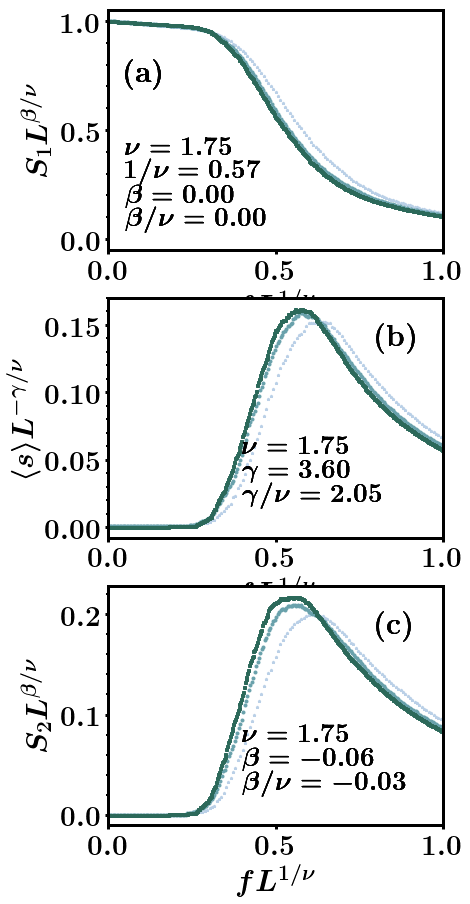

In [114]:
sizes = [1024, 2048, 4096, 8192, 16384]

l_cutoff = get_l_cutoff(sizes, rc_values=rc_values, threshold=0.02)

dfs = {}
for N in sizes:
    attack = 'BtwU_cutoff{}'.format(l_cutoff[N]) 
    try:
        dfs[N] = load_dataframe(net_type, N, param, attack, min_nseeds=100)
    except FileNotFoundError:
        continue
        
N_values = np.sort(list(dfs.keys()))
L_values = np.sqrt(N_values)

colormap = sns.cubehelix_palette(
    len(L_values), start=2, rot=0.3, light=0.8, dark=0.1
)

ncols = 1
nrows = 3
fig, axes = plt.subplots(figsize=(6*ncols, 5*nrows), ncols=ncols, nrows=nrows)

for ax in axes:
    ax.set_xlim(0, 1)
    ax.set_xlabel(r'$f L^{1/\nu}$')

ax = axes[0]
ax.set_ylabel(r'$S_1 L^{\beta/\nu}$')
ax = axes[1]
ax.set_ylabel(r'$\langle s\rangle L^{-\gamma/\nu}$')
ax = axes[2]
ax.set_ylabel(r'$S_2 L^{\beta/\nu}$')

for i, N in enumerate(N_values):
    print(N)
    df = dfs[N]
    L = np.sqrt(N)
    
    ax = axes[0]
    ax.text(0.05, 0.7, letters[0], transform=ax.transAxes, fontsize=30)
    #one_over_nu = 5/9
    one_over_nu = 0.57
    nu = 1 / one_over_nu
    beta = 0
    beta_over_nu = beta / nu
    ax.plot(df.f*L**one_over_nu, df.Sgcc*N**(beta_over_nu), linestyle='', marker=markers[i], markersize=3,
        label=r'${{{}}}$'.format(N), color=colormap[i])
    ax.text(0.05, 0.4, r'$\nu = {{{:.2f}}}$'.format(nu), 
            transform=ax.transAxes, fontsize=26)
    ax.text(0.05, 0.3, r'$1/\nu = {{{:.2f}}}$'.format(one_over_nu), 
            transform=ax.transAxes, fontsize=26)
    ax.text(0.05, 0.2, r'$\beta = {{{:.2f}}}$'.format(beta), 
            transform=ax.transAxes, fontsize=26)
    ax.text(0.05, 0.1, r'$\beta/\nu = {{{:.2f}}}$'.format(beta_over_nu), 
            transform=ax.transAxes, fontsize=26)
    
    
    ax = axes[1]
    ax.text(0.8, 0.8, letters[1], transform=ax.transAxes, fontsize=30)
    #one_over_nu = 5/9
    one_over_nu = 0.57
    nu = 1 / one_over_nu
    gamma_over_nu = 2.05
    gamma = gamma_over_nu * nu
    ax.plot(
        df.f*L**one_over_nu, df.meanS*L**(-gamma_over_nu), linestyle='', 
        marker=markers[i], markersize=3, color=colormap[i]
    )
    ax.text(0.4, 0.35, r'$\nu = {{{:.2f}}}$'.format(nu), 
            transform=ax.transAxes, fontsize=26)
    ax.text(0.4, 0.25, r'$\gamma = {{{:.2f}}}$'.format(gamma), 
            transform=ax.transAxes, fontsize=26)
    ax.text(0.4, 0.15, r'$\gamma/\nu = {{{:.2f}}}$'.format(gamma_over_nu), 
            transform=ax.transAxes, fontsize=26)
    
    
    ax = axes[2]
    ax.text(0.8, 0.8, letters[2], transform=ax.transAxes, fontsize=30)
    #one_over_nu = 5/9
    one_over_nu = 0.57
    nu = 1 / one_over_nu
    beta = -0.06
    beta_over_nu = beta / nu
    ax.plot(
        df.f*L**one_over_nu, df.Nsec*L**(beta_over_nu-2), linestyle='', 
        marker=markers[i], markersize=3, color=colormap[i]
    )
    ax.text(0.4, 0.35, r'$\nu = {{{:.2f}}}$'.format(nu), 
            transform=ax.transAxes, fontsize=26)
    ax.text(0.4, 0.25, r'$\beta = {{{:.2f}}}$'.format(beta), 
            transform=ax.transAxes, fontsize=26)
    ax.text(0.4, 0.15, r'$\beta/\nu = {{{:.2f}}}$'.format(beta_over_nu), 
            transform=ax.transAxes, fontsize=26)


legend = axes[0].legend(fontsize=22, frameon=False)
legend.set_title(r'$L^2$', prop={'size':22})

sns.despine()
plt.tight_layout()
fig_name = os.path.join(fig_dir, 'collapse_Bl_B_{}'.format(net_type))
plt.savefig(fig_name + '.png')
plt.savefig(fig_name + '.pdf')
plt.show()